In [18]:
library(tidyverse)
options(repr.matrix.max.rows = 6)
library(readxl)

In [23]:
url_1 <- "https://archive.ics.uci.edu/static/public/257/user+knowledge+modeling.zip"
destination2 <- "data/userknowledge.zip"
download.file(url_1, "data/userknowledge.zip")
outdir1 <- "data/unzip1"
unzip("data/userknowledge.zip", exdir = outdir1)

New names:
• `` -> `...7`
• `` -> `...8`


STG,SCG,STR,LPR,PEG,UNS,...7,...8,Attribute Information:
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<lgl>,<chr>
0.00,0.00,0.00,0.00,0.00,very_low,NA,NA,"STG (The degree of study time for goal object materails),"
0.08,0.08,0.10,0.24,0.90,High,NA,NA,SCG (The degree of repetition number of user for goal object materails)
0.06,0.06,0.05,0.25,0.33,Low,NA,NA,STR (The degree of study time of user for related objects with goal object)
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
0.54,0.82,0.71,0.29,0.77,High,NA,NA,NA
0.50,0.75,0.81,0.61,0.26,Middle,NA,NA,NA
0.66,0.90,0.76,0.87,0.74,High,NA,NA,NA


In [25]:
userknowledge_training <- read_excel("data/unzip1/Data_User_Modeling_Dataset_Hamdi Tolga KAHRAMAN.xls", sheet = "Training_Data")|>
                          select(STG:UNS)|>
                          mutate(UNS = as_factor(UNS))

userknowledge_testing <- read_excel("data/unzip1/Data_User_Modeling_Dataset_Hamdi Tolga KAHRAMAN.xls", sheet = "Test_Data")|>
                         select(STG:UNS)|>
                         mutate(UNS = as_factor(UNS))


New names:
• `` -> `...7`
• `` -> `...8`


STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.00,0.00,0.00,0.00,0.00,very_low
0.08,0.08,0.10,0.24,0.90,High
0.06,0.06,0.05,0.25,0.33,Low
⋮,⋮,⋮,⋮,⋮,⋮
0.54,0.82,0.71,0.29,0.77,High
0.50,0.75,0.81,0.61,0.26,Middle
0.66,0.90,0.76,0.87,0.74,High


New names:
• `` -> `...7`
• `` -> `...8`


STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.00,0.10,0.50,0.26,0.05,Very Low
0.05,0.05,0.55,0.60,0.14,Low
0.08,0.18,0.63,0.60,0.85,High
⋮,⋮,⋮,⋮,⋮,⋮
0.56,0.60,0.77,0.13,0.32,Low
0.66,0.68,0.81,0.57,0.57,Middle
0.68,0.64,0.79,0.97,0.24,Middle


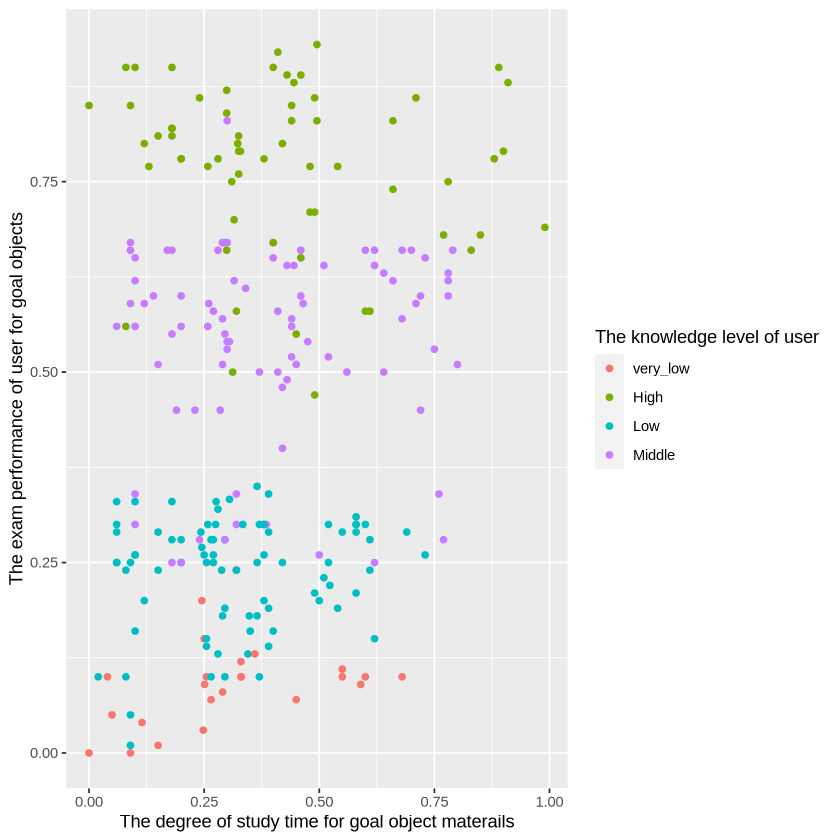

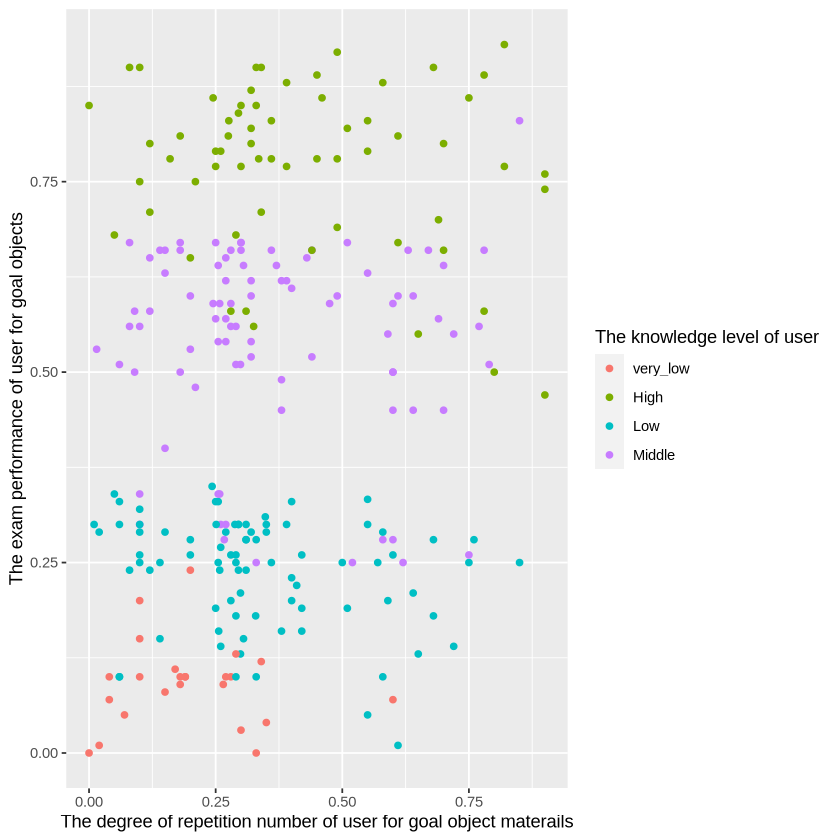

In [27]:
STG_PEG_plot <- ggplot(userknowledge_training, aes(x = STG, y = PEG, colour = UNS)) + 
                geom_point() + labs(x = "The degree of study time for goal object materails", 
                                    y = "The exam performance of user for goal objects" , 
                                    colour = "The knowledge level of user")
STG_PEG_plot

SCG_PEG_plot <- ggplot(userknowledge_training, aes(x = SCG, y = PEG, colour = UNS)) + 
                geom_point() + labs(x = "The degree of repetition number of user for goal object materails", 
                                    y = "The exam performance of user for goal objects" , 
                                    colour = "The knowledge level of user")
SCG_PEG_plot